### Seminal quality prediction using logistic regression


##### Activation function


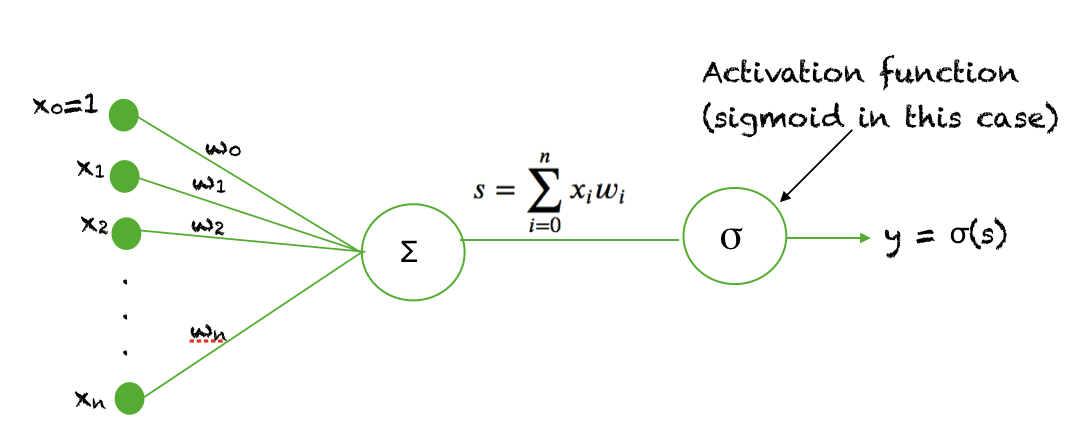


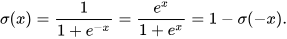


In [525]:
import numpy as np


def sigmoid(z):
    return 1/(1 + np.exp(-z))

##### Loss/Cost function

- Binary cross entory loss
- Also resolved by logarithmic loss or log loss
- The aim is to minimise this loss
- `L = −[𝑦log(𝑝)+(1−𝑦)log(1−𝑝)]` since this is a binary classification task ( multiclass classification will be resolved differently)

In [526]:
def binary_cross_entorypy_loss(y_true, y_pred):
    # Clip the predicted probabilities to prevent NaNs.
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    return -1 * np.mean(y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred))

#### Model creation


In [527]:
class SQModel():
    def __init__(self, lr=0.0099, iters=100):
        self.lr = lr
        self.iters = iters
        self.weights = None
        self.bias = None
        self.loss = np.array([])

    # Hypothesis of x
    def hx(self, w, X):
        bias = w[0]
        weights = w[1:]

        wX = np.array(X.dot(weights))
        z = bias + wX

        return sigmoid(z)

    def cost(self, w, X, Y):
        y_pred = self.hx(w, X)
        return binary_cross_entorypy_loss(Y, y_pred)

    def gradients(self, w, X, Y):
        y_pred = self.hx(w, X)
        g = np.array([])

        dww = -1 * np.sum(Y*(1-y_pred) - (1-Y)*y_pred)
        g = np.append(g, dww)

        for i in range(1, len(w)):
            dw = -1 * np.sum(Y*(1-y_pred)*X[:, i-1] - (1-Y)*y_pred*X[:, i-1])
            g = np.append(g, dw)

        return g

    # Optimize model parameters(weight and bias)
    # and minimize cost function using gradient descent
    def descent(self, X, Y):
        # Initialize weights to 1s, including bias
        n_features = X.shape[1]
        self.weights = w_new = w_prev = np.ones(n_features + 1)

        for iter in range(self.iters):
            w_prev = w_new
            w_new = np.array([])
            for i in range(len(w_prev)):
                wi = w_prev[i] - self.lr * self.gradients(w_prev, X, Y)[i]
                w_new = np.append(w_new, wi)

            loss = self.cost(w_prev, X, Y)
            self.loss = np.append(self.loss, loss)

            # print('\niter: ', iter)
            # print('w: ', w_prev)

            # TODO: ??? powr?
            if np.sum((w_new - w_prev)**2) < pow(10, -6):
                return w_new

        return w_new

    def fit(self, X, Y):
        self.weights = self.descent(X, Y)

    def predict(self, X):
        y_pred = self.hx(self.weights, X)
        return y_pred

        # Convert to class predictions
        # class_pred = [0 if y<0.5 else 1 for y in y_pred]
        # return class_pred

##### Data preprocessing


In [528]:
import pandas as pd

Load data and review dimensionality


In [529]:
col_names = np.array(['season', 'age', 'child_diseases', 'accident',
                      'surgical_intervention', 'high_fevers',
                      'alcohol', 'smoking', 'hrs_sitting', 'diagnosis'])

data = pd.read_csv("data/fertility_Diagnosis.csv",
                   header=None, names=col_names)
data.dropna(inplace=True)

print("Data dimensionality", data.shape)
data.head()

Data dimensionality (100, 10)


,season,age,child_diseases,accident,surgical_intervention,high_fevers,alcohol,smoking,hrs_sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


Encoding the target

| Diagnosis | Label | Encoding |
| --------- | ----- | -------- |
| `normal`  | `N`   | `0`      |
| `altered` | `O`   | `1`      |


In [530]:

from sklearn.preprocessing import LabelEncoder

In [531]:
diagnosis = data.iloc[:, -1]

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(diagnosis)

# Review the encoded lables
encoded_compr = pd.DataFrame(
    {'diagnosis': diagnosis, 'encoded_label': encoded_label})
encoded_compr.head()

,diagnosis,encoded_label
0,N,0
1,O,1
2,N,0
3,N,0
4,O,1


Review data distribution of target


<Axes: title={'center': 'Distribution of diagnosis results'}, xlabel='Diagnosis', ylabel='Frequency'>

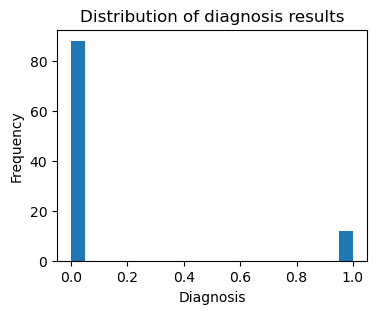

In [532]:
distr = pd.DataFrame(encoded_label)
distr.plot.hist(bins=20,
                figsize=(4, 3),
                xlabel='Diagnosis',
                legend=False,
                title='Distribution of diagnosis results')

#### Model training


In [533]:
from sklearn.model_selection import train_test_split

Split training and test data

In [534]:
X = data.iloc[:, :-1]
Y = encoded_label

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), Y, test_size=0.25, random_state=42)

Fit the model

In [535]:
epochs = 70
learning_rate = 0.00099

model = SQModel(lr=learning_rate, iters=epochs)
model.fit(X_train, y_train)

print('weights: ', model.weights)
print('\nloss: ', model.loss)

weights:  [-0.80741714  1.02010871 -0.19632297 -0.53500772  0.08344922  0.27837845
  0.46681835 -0.47085696  1.13618373  0.26025011]

loss:  [3.84460666 3.64846444 3.45499476 3.26473971 3.07831559 2.8964058
 2.71974557 2.54909739 2.3852175  2.22881577 2.08051314 1.94080222
 1.81001711 1.68831676 1.57568411 1.47193982 1.37676726 1.28974376
 1.21037351 1.13811813 1.07242271 1.0127361  0.95852573 0.90928735
 0.86455084 0.82388293 0.78688772 0.75320577 0.72251222 0.69451439
 0.66894923 0.64558059 0.62419667 0.60460751 0.5866428  0.57014974
 0.55499119 0.54104397 0.52819736 0.51635178 0.50541755 0.49531384
 0.48596776 0.47731349 0.46929153 0.46184806 0.45493437 0.44850628
 0.44252373 0.43695034 0.43175304 0.42690175 0.42236908 0.41813007
 0.41416195 0.41044392 0.40695699 0.40368378 0.40060838 0.39771621
 0.39499392 0.39242922 0.39001087 0.38772848 0.38557255 0.38353427
 0.38160558 0.37977901 0.37804768 0.37640522]


#### Model evaluation

In [536]:
import matplotlib.pyplot as plt

##### Loss

Plot binary cross-entropy loss per each training epoch

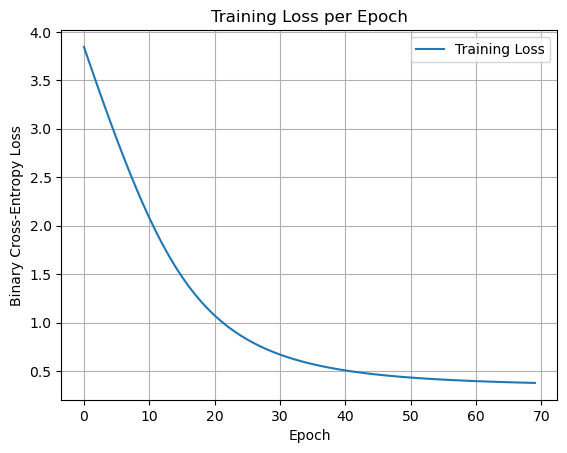

In [537]:
plt.plot(range(epochs), model.loss, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training Loss per Epoch')
plt.legend()
plt.grid()
plt.show()

As per the grapgh above, the chosen learning rate seems to showcase a good trajectory for convergence.

Reference:

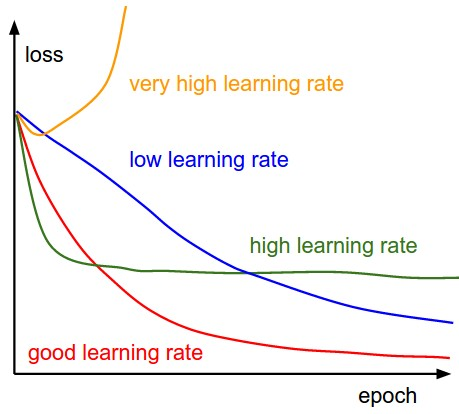

##### Accuracy

In [34]:
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [71]:
def predict(w, X):
    y_pred = hx(w, X)
    class_pred = [0 if y < 0.15 else 1 for y in y_pred]
    return class_pred

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0]


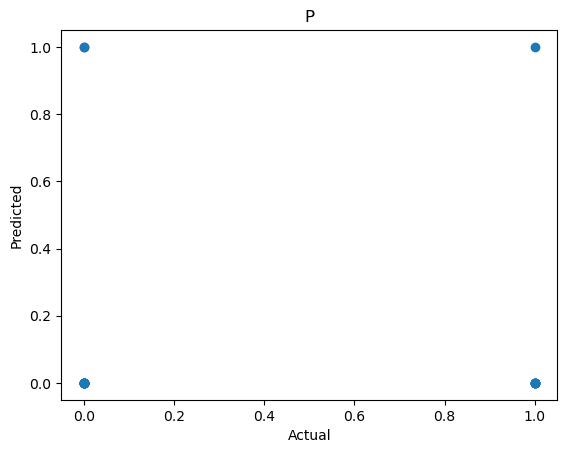

In [72]:
# Use the new weights to fit new data
y_pred = predict(w, X_test)

print(y_pred)

plt.scatter(y_pred, y_test)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('P')
plt.show()

Metrics evaluation


In [73]:
y_pred = predict(w, X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
report = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
log_loss = metrics.log_loss(y_test, y_pred)

print('Accuracy score: {} \n'.format(accuracy))
print('Classification report: \n {}'.format(report))
print('ROC & AUC: {} \n'.format(roc_auc))
print('Log loss: {} \n'.format(log_loss))

Accuracy score: 0.68 

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        22
           1       0.14      0.33      0.20         3

    accuracy                           0.68        25
   macro avg       0.52      0.53      0.50        25
weighted avg       0.80      0.68      0.73        25

ROC & AUC: 0.5303030303030303 

Log loss: 11.533969084517489 



Confusion matrix


Text(0.5, 427.9555555555555, 'Predicted label')

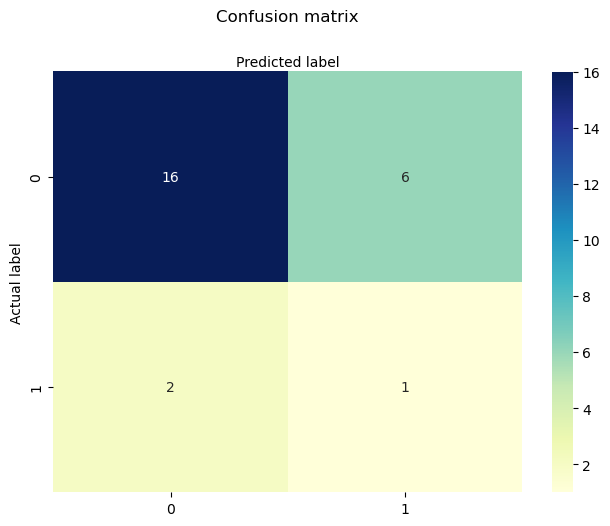

In [74]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0, 1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [75]:
# def graph(formula, x_range):
#     x = np.array(x_range)
#     y = formula(x)
#     plt.plot(x, y)

# def my_formula(x):
#     return (-w[0]-w[1]*x)/w[2]

# from matplotlib import pyplot as plt
# from pandas import DataFrame
# df = DataFrame(dict(x=X[:,0], y=X[:,1], label=Y))
# colors = {0:'green', 1:'red'}
# fig, ax = plt.subplots()
# grouped = df.groupby('label')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# graph(my_formula, range(-20,15))
# plt.xlabel('Green')
# plt.ylabel('Red')
# plt.show()

Check the papaper on metrics


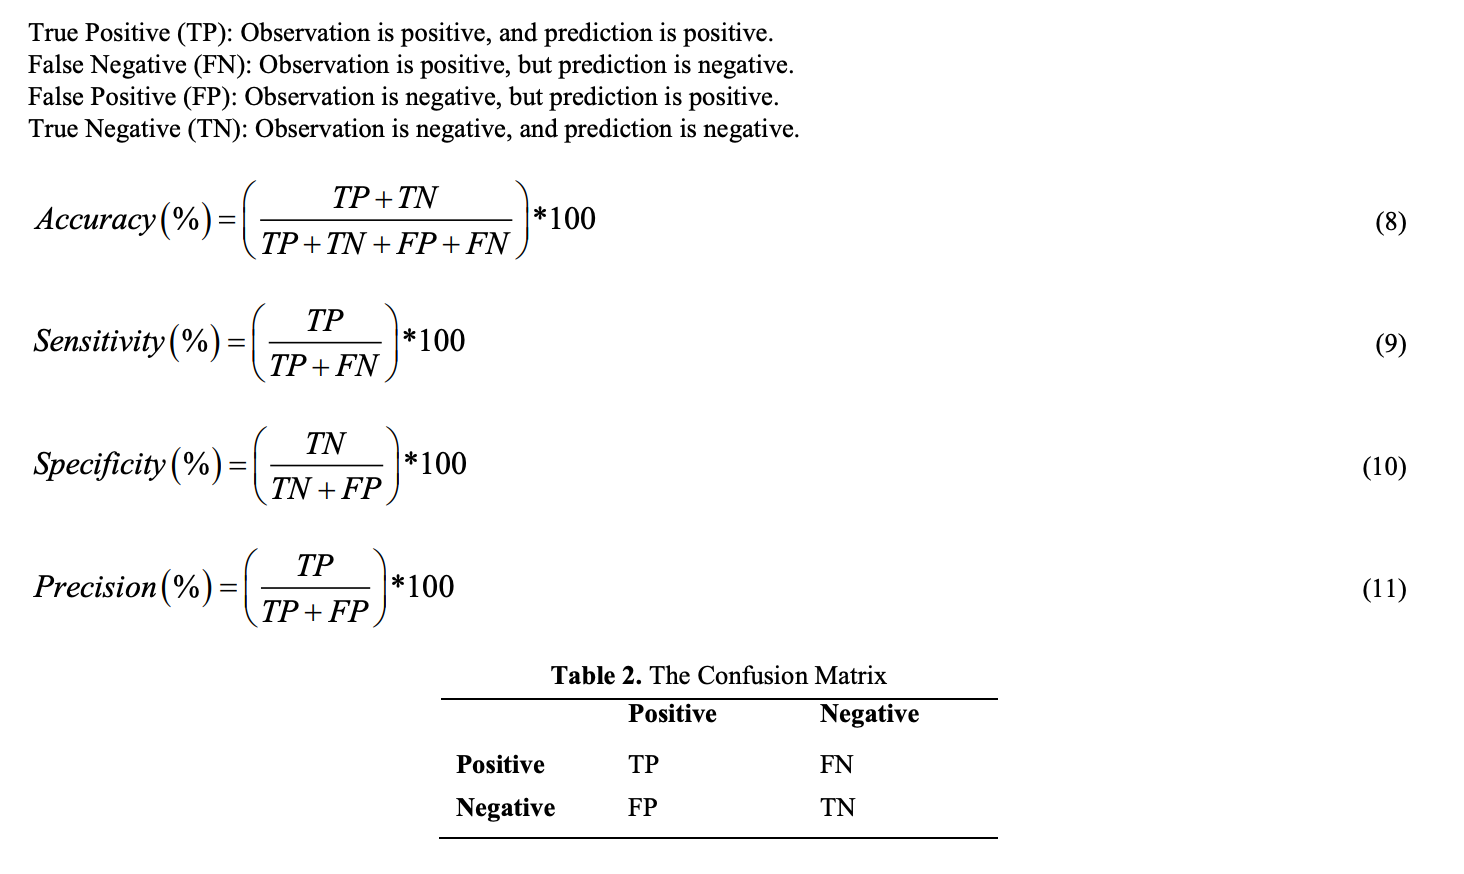


# Loss